# [Linked List Python](https://github.com/dashidhy/algorithm-pattern-python/blob/master/data_structure/linked_list.md)

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __repr__(self):
        cur = self
        vals = []
        while cur:
            vals.append(cur.val)
            cur = cur.next
        return str(vals)
        
class List:
    def __init__(self, vals):
        if not vals:
            raise ValueError('Must initialize List with a non-empty array. ')
        cur = self.head = ListNode(vals[0])
        for val in vals[1:]:
            cur.next = ListNode(val)
            cur = cur.next
    
    def __repr__(self):
        return str(self.head)
    
print(List([1, 2, 3]).head)
print(List([1, 2, 3]))

[1, 2, 3]
[1, 2, 3]


## [83. Remove Duplicates from Sorted List](https://leetcode.com/problems/remove-duplicates-from-sorted-list/)

Easy

Given the head of a sorted linked list, delete all duplicates such that each element appears only once. Return the linked list sorted as well.

Example 1:

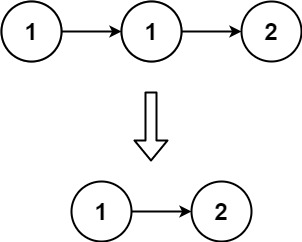

    Input: head = [1,1,2]
    Output: [1,2]
 
Constraints:

    The number of nodes in the list is in the range [0, 300].
    -100 <= Node.val <= 100
    The list is guaranteed to be sorted in ascending order.

In [23]:
def deleteDuplicates(head):
    cur = head
    while cur and cur.next:
        if cur.val == cur.next.val:
            cur.next = cur.next.next
        else:
            cur = cur.next
    return head

lst = List([1, 1, 2])
deleteDuplicates(lst.head)

[1, 2]

## [82. Remove Duplicates from Sorted List II](https://leetcode.com/problems/remove-duplicates-from-sorted-list-ii/)

Medium

Given the head of a sorted linked list, delete all nodes that have duplicate numbers, leaving only distinct numbers from the original list. Return the linked list sorted as well.

Example 1:

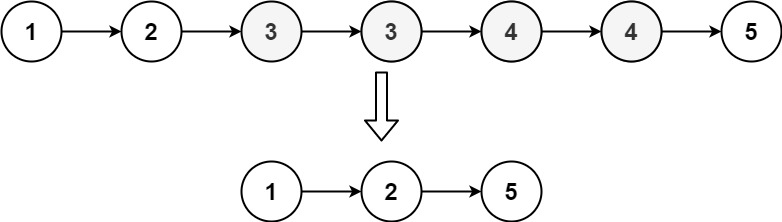

    Input: head = [1,2,3,3,4,4,5]
    Output: [1,2,5]

Constraints:

    The number of nodes in the list is in the range [0, 300].
    -100 <= Node.val <= 100
    The list is guaranteed to be sorted in ascending order.

In [7]:
# head 有可能被砍掉，所以要用一個 dummy node hold 著整個 list。
# 裡層 while 條件要放 cur 而不是 cur.next 不然 [1, 1] 不會過

def deleteDuplicates(head):
    cur = head
    dummy = prev = ListNode(next=head)

    while cur and cur.next:
        if cur.val == cur.next.val:
            cur_val = cur.val
            while cur and cur.val == cur_val:
                cur = cur.next
            prev.next = cur
        else:
            prev = cur
            cur = cur.next

    return dummy.next

lst = List([1, 2, 3, 3, 4, 4, 5])
deleteDuplicates(lst.head)

[1, 2, 5]

## [206. Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/)

Easy

Given the head of a singly linked list, reverse the list, and return the reversed list.

Example 1:

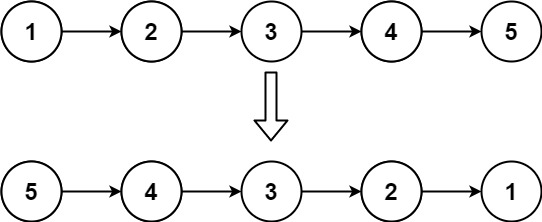

    Input: head = [1,2,3,4,5]
    Output: [5,4,3,2,1]

Constraints:

    The number of nodes in the list is the range [0, 5000].
    -5000 <= Node.val <= 5000


In [8]:
# Hannah's solution：不改指標而是倒著長一個新的 list
# 實測比改指標用到更多 memory

def reverseList(head):
    res = None
    while head:
        res = ListNode(val=head.val, next=res)
        head = head.next
    return res

lst = List([1, 2, 3, 4, 5])
reverseList(lst.head)

[5, 4, 3, 2, 1]

In [2]:
# 改指標；迴圈裡用 tmp 寫比較直觀 readable
# 雖然也可以用 tuple unpacking 寫成 cur.next, prev, cur = prev, cur, cur.next

def reverseList(head):
    prev = None
    cur = head
    while cur:
        tmp = cur.next
        cur.next = prev
        prev = cur
        cur = tmp
        
    return prev

lst = List([1, 2, 3, 4, 5])
reverseList(lst.head)

[5, 4, 3, 2, 1]

In [11]:
# recursive solution from the repo
# 遞迴呼叫完成時的狀態是 1 -> 2 <- 3 <- 4 <- 5，head 是 1

def reverseList(head):
    if head is None or head.next is None:
        return head

    reverse = reverseList(head.next)
    head.next.next = head
    head.next = None
    
    return reverse

lst = List([1, 2, 3, 4, 5])
reverseList(lst.head)

[5, 4, 3, 2, 1]

## [92. Reverse Linked List II](https://leetcode.com/problems/reverse-linked-list-ii/)

Medium

Given the head of a singly linked list and two integers left and right where left <= right, reverse the nodes of the list from position left to position right, and return the reversed list.

Example 1:

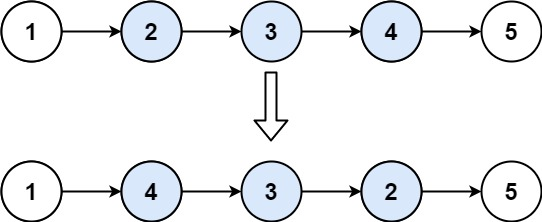

    Input: head = [1,2,3,4,5], left = 2, right = 4
    Output: [1,4,3,2,5]

Constraints:

    The number of nodes in the list is n.
    1 <= n <= 500
    -500 <= Node.val <= 500
    1 <= left <= right <= n
 
Follow up: Could you do it in one pass?

In [12]:
# Hannah's method：移到 left 之前然後開始倒著長一個新的 list named reverse，最後再接起來
# 為了要接起來要先保留 left 之前的 node（reverse_l）和 reverse 的最後一個 node（reverse_r）
# left 有可能是 1 所以需要用 dummy node hold 著

def reverseBetween(head, left, right):
    cur = dummy = ListNode(next=head)
    for _ in range(left-1):
        cur = cur.next

    reverse_l = cur
    cur = cur.next

    reverse_r = reverse = ListNode(val=cur.val, next=None)
    cur = cur.next
    
    for _ in range(right-left):
        reverse = ListNode(val=cur.val, next=reverse)
        cur = cur.next

    reverse_l.next = reverse
    reverse_r.next = cur

    return dummy.next

lst = List([1, 2, 3, 4, 5])
reverseBetween(lst.head, left=2, right=4)

[1, 4, 3, 2, 5]

In [13]:
# 改指標

def reverseBetween(head, left, right):
    prev = dummy = ListNode(next=head)
    cur = head
    for _ in range(left-1):
        prev, cur = cur, cur.next

    reverse_l = prev
    reverse_r = cur
    for _ in range(right-left+1):
        tmp = cur.next
        cur.next = prev
        prev = cur
        cur = tmp

    reverse_l.next = prev
    reverse_r.next = cur

    return dummy.next

lst = List([1, 2, 3, 4, 5])
reverseBetween(lst.head, left=2, right=4)

[1, 4, 3, 2, 5]

## [21. Merge Two Sorted Lists](https://leetcode.com/problems/merge-two-sorted-lists/)

Easy

Merge two sorted linked lists and return it as a sorted list. The list should be made by splicing together the nodes of the first two lists. 

Example 1:

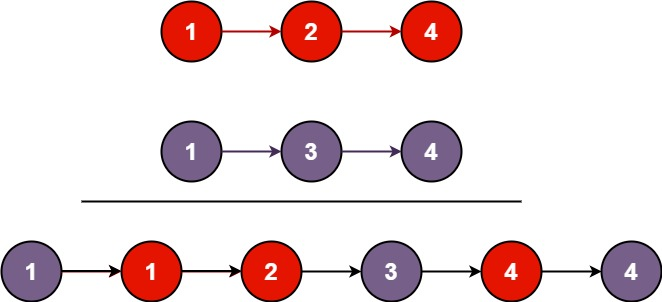

    Input: l1 = [1,2,4], l2 = [1,3,4]
    Output: [1,1,2,3,4,4]

Constraints:

    The number of nodes in both lists is in the range [0, 50].
    -100 <= Node.val <= 100
    Both l1 and l2 are sorted in non-decreasing order.

In [15]:
# 有可能 l1 l2 都是 empty 所以要用 dummy node

def mergeTwoLists(l1, l2):
    dummy = cur = ListNode()
    while l1 and l2:
        if l1.val < l2.val:
            cur.next = l1
            l1 = l1.next
        else:
            cur.next = l2
            l2 = l2.next

        cur = cur.next

    if not l1:
        cur.next = l2
    if not l2:
        cur.next = l1

    return dummy.next


lst1 = List([1, 2, 4])
lst2 = List([1, 3, 4])
mergeTwoLists(lst1.head, lst2.head)

[1, 1, 2, 3, 4, 4]

## [86. Partition List](https://leetcode.com/problems/partition-list/)

Medium

Given the head of a linked list and a value x, partition it such that all nodes less than x come before nodes greater than or equal to x.

You should preserve the original relative order of the nodes in each of the two partitions.

Example 1:

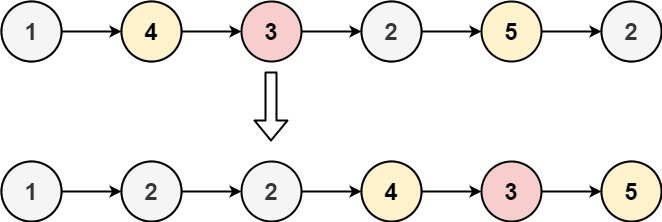

    Input: head = [1,4,3,2,5,2], x = 3
    Output: [1,2,2,4,3,5]

Constraints:

    The number of nodes in the list is in the range [0, 200].
    -100 <= Node.val <= 100
    -200 <= x <= 200

In [17]:
# 建兩個 list：small 和 large 最後再接起來
# 要記得切斷 large 的尾巴不然 list 會有 cycle

def partition(head, x):
    small_cur = small_dummy = ListNode()
    large_cur = large_dummy = ListNode()
    cur = head
    while cur:
        if cur.val < x:
            small_cur.next = cur
            small_cur = small_cur.next
        else:
            large_cur.next = cur
            large_cur = large_cur.next

        cur = cur.next

    large_cur.next = None
    small_cur.next = large_dummy.next

    return small_dummy.next

lst = List([1, 4, 3, 2, 5, 2])
partition(lst.head, x=3)

[1, 2, 2, 4, 3, 5]

## [148. Sort List](https://leetcode.com/problems/sort-list/)

Medium

Given the head of a linked list, return the list after sorting it in ascending order.

Follow up: Can you sort the linked list in O(n logn) time and O(1) memory (i.e. constant space)?

Example 1:

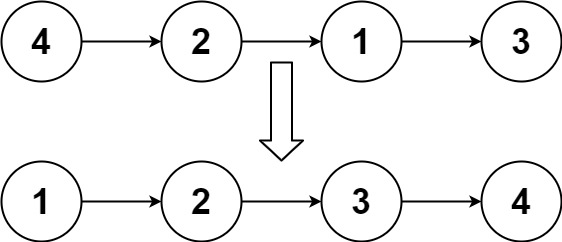

    Input: head = [4,2,1,3]
    Output: [1,2,3,4] 

Constraints:

    The number of nodes in the list is in the range [0, 5 * 10^4].
    -10^5 <= Node.val <= 10^5

In [18]:
# Merge Sort，最下面的 mergeTwoLists 是 21 的答案
# 丟進遞迴之前要記得砍斷尾巴
# LeetCode 上比較快的作法都是作弊：先把值抄進 array，排序完再重新造一個 list 回傳

def sortList(head):
    length = 0
    cur = head
    while cur:
        cur = cur.next
        length += 1

    return mergeSort(head, length)

def mergeSort(head, n):        
    if n < 2:
        return head

    prev = dummy = ListNode(next=head)        
    cur = head
    for _ in range(n//2):
        prev, cur = cur, cur.next
    prev.next = None

    l1 = mergeSort(dummy.next, n//2)
    l2 = mergeSort(cur, n-n//2)

    return mergeTwoLists(l1, l2)

lst = List([4, 2, 1, 3])
sortList(lst.head)

[1, 2, 3, 4]

## [143. Reorder List](https://leetcode.com/problems/reorder-list/)

Medium

You are given the head of a singly linked-list. The list can be represented as:

    L0 → L1 → … → Ln - 1 → Ln

Reorder the list to be on the following form:

    L0 → Ln → L1 → Ln - 1 → L2 → Ln - 2 → …

You may not modify the values in the list's nodes. Only nodes themselves may be changed.


Example 1:

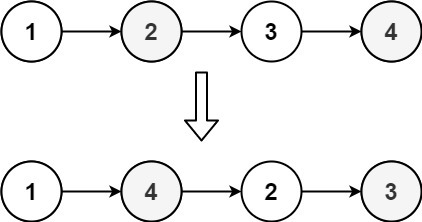

    Input: head = [1,2,3,4]
    Output: [1,4,2,3]

Constraints:

    The number of nodes in the list is in the range [1, 5*10^4].
    1 <= Node.val <= 1000

In [19]:
# find middle -> reverse 2nd half -> merge
# 這裡的 find middle 和 876 不一樣。876 是 [1, 2, 3, 4, 5] -> [1, 2] + [3, 4, 5]，這裡變成 [1, 2, 3] + [4, 5]

def reorderList(head):
    # find middle 
    dummy = fast = head
    slow = head.next
    while fast and fast.next:
        fast = fast.next.next
        dummy = slow
        slow = slow.next

    # reverse 2nd half; Hannah 寫法
    cur2 = None
    while slow:
        cur2 = ListNode(val=slow.val, next=cur2)
        slow = slow.next

    # merge
    cur1 = head
    dummy.next = None     # 把 1st half 的尾巴砍斷
    while cur1 and cur2:
        tmp1 = cur1.next
        tmp2 = cur2.next
        cur1.next = cur2
        cur2.next = tmp1
        cur1 = tmp1
        cur2 = tmp2

    return head

lst = List([1, 2, 3, 4])
reorderList(lst.head)

[1, 4, 2, 3]

## [141. Linked List Cycle](https://leetcode.com/problems/linked-list-cycle/)

Easy

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

Example 1:

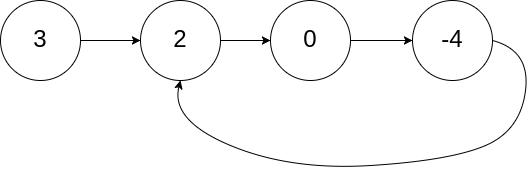

    Input: head = [3,2,0,-4], pos = 1
    Output: true
    Explanation: There is a cycle in the linked list, where the tail connects to the 1st node (0-indexed).

Constraints:

    The number of the nodes in the list is in the range [0, 10^4].
    -10^5 <= Node.val <= 10^5
    pos is -1 or a valid index in the linked-list.

 
Follow up: Can you solve it using O(1) (i.e. constant) memory?

In [ ]:
def hasCycle(head):
    fast = slow = head
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
        if fast is slow: 
            return True
        
    return False

## [142. Linked List Cycle II](https://leetcode.com/problems/linked-list-cycle-ii/)

Medium

Given a linked list, return the node where the cycle begins. If there is no cycle, return null.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Notice that you should not modify the linked list. 

Example 1:

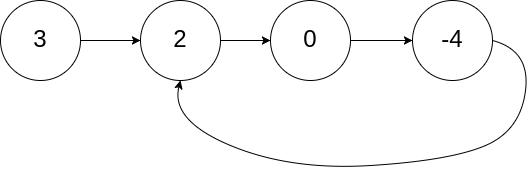

    Input: head = [3,2,0,-4], pos = 1
    Output: tail connects to node index 1
    Explanation: There is a cycle in the linked list, where tail connects to the second node.

Constraints:

    The number of the nodes in the list is in the range [0, 10^4].
    -10^5 <= Node.val <= 10^5
    pos is -1 or a valid index in the linked-list.


Follow up: Can you solve it using O(1) (i.e. constant) memory?

In [1]:
def detectCycle(head):
    fast = slow = head
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
        if fast is slow: 
            # 接下來四行應該要可以直接省略而回傳 slow，但這樣不會 accept
            slow = head
            while fast != slow:
                fast = fast.next
                slow = slow.next
            return slow        

## [234. Palindrome Linked List](https://leetcode.com/problems/palindrome-linked-list/)

Easy

Given the head of a singly linked list, return true if it is a palindrome.

Example 1:

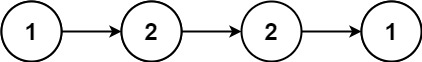

    Input: head = [1,2,2,1]
    Output: true

Constraints:

    The number of nodes in the list is in the range [1, 10^5].
    0 <= Node.val <= 9
 
Follow up: Could you do it in O(n) time and O(1) space?

In [12]:
# LeetCode 上最快解答但改用 tmp，一邊找中點一邊把 slow 跑遍的 node （倒著）放進 reverse 裡
# 迴圈裡的 tmp 可以寫成 rev, slow, rev.next = slow, slow.next, rev
# if fast 那段：如果 input list 長度是奇數例如 [1, 2, 3, 2, 1]，我們需要 slow 是 [2, 1] 而不是 [3, 2, 1]

def isPalindrome(head):
    slow = fast = head
    rev = None
    while fast and fast.next:
        fast = fast.next.next
        tmp = rev
        rev = slow
        slow = slow.next
        rev.next = tmp
        
    if fast:
        slow = slow.next
    while slow and rev and slow.val==rev.val:
        slow, rev = slow.next, rev.next
    return not rev

lst = List([1, 2, 3, 4, 4, 3, 2, 1])
isPalindrome(lst.head)

True

## [138. Copy List with Random Pointer](https://leetcode.com/problems/copy-list-with-random-pointer/)

Medium

A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.

Return the head of the copied linked list.

The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of [val, random_index] where:

    val: an integer representing Node.val
    random_index: the index of the node (range from 0 to n-1) that the random pointer points to, or null if it does not point to any node.

Your code will only be given the head of the original linked list.

Example 1:

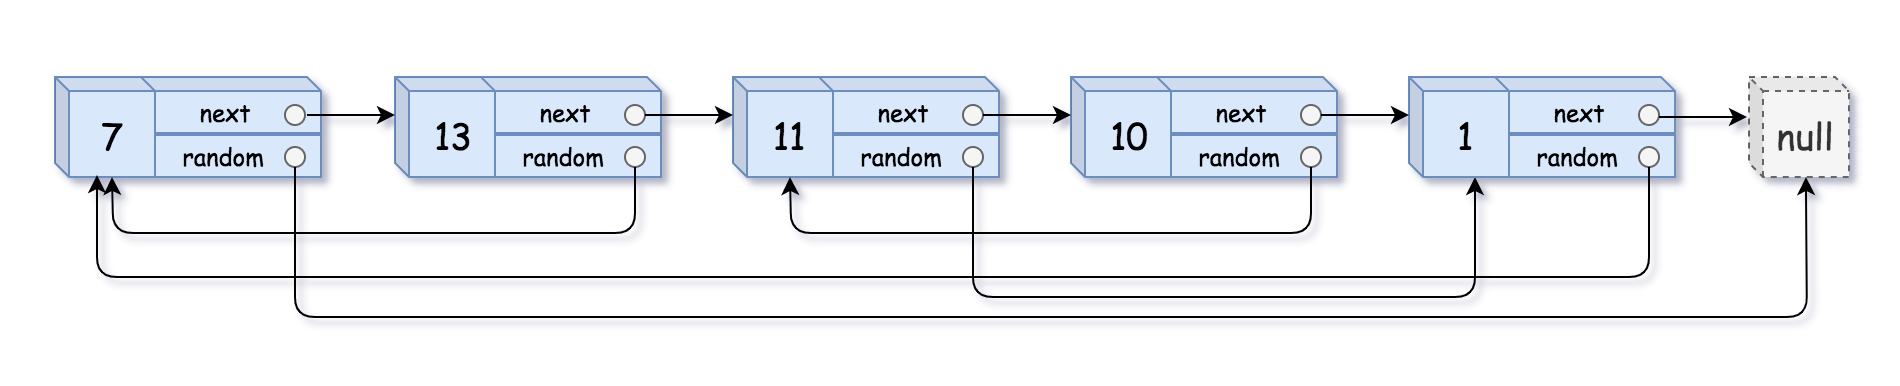

    Input: head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
    Output: [[7,null],[13,0],[11,4],[10,2],[1,0]]

Constraints:

    0 <= n <= 1000
    -10000 <= Node.val <= 10000
    Node.random is null or is pointing to some node in the linked list.

In [3]:
# LeetCode 上最快解答，用 defaultdict 的 key 存原來的 nodes，value 存對應的 copy
# My Ugly Solutions 裡有用 id() 的做法

from collections import defaultdict

def copyRandomList(head):
    d = defaultdict(lambda: Node(0)) # store the nodes
    d[None] = None # if a node's next/random is None, 
    cur = head
    
    while cur:
        d[cur].val = cur.val
        d[cur].next = d[cur.next]
        d[cur].random = d[cur.random]
        cur = cur.next
        
    return d[head]

## [876. Middle of the Linked List](https://leetcode.com/problems/middle-of-the-linked-list/)

Easy

Given a non-empty, singly linked list with head node head, return a middle node of linked list.

If there are two middle nodes, return the second middle node. 

Example 1:

    Input: [1,2,3,4,5]
    Output: Node 3 from this list (Serialization: [3,4,5])
    The returned node has value 3.  (The judge's serialization of this node is [3,4,5]).
    Note that we returned a ListNode object ans, such that:
    ans.val = 3, ans.next.val = 4, ans.next.next.val = 5, and ans.next.next.next = NULL.

Note:

    The number of nodes in the given list will be between 1 and 100.



In [9]:
def middleNode(head):
    fast = slow = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    return slow

lst = List([1, 2, 3, 4, 5])
print(middleNode(lst.head))

lst = List([1, 2, 3, 4])
print(middleNode(lst.head))

[3, 4, 5]
[3, 4]
